# Heart Attack Analysis & Prediction

## Importing libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing and visualising the dataset


In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.shape

(303, 14)

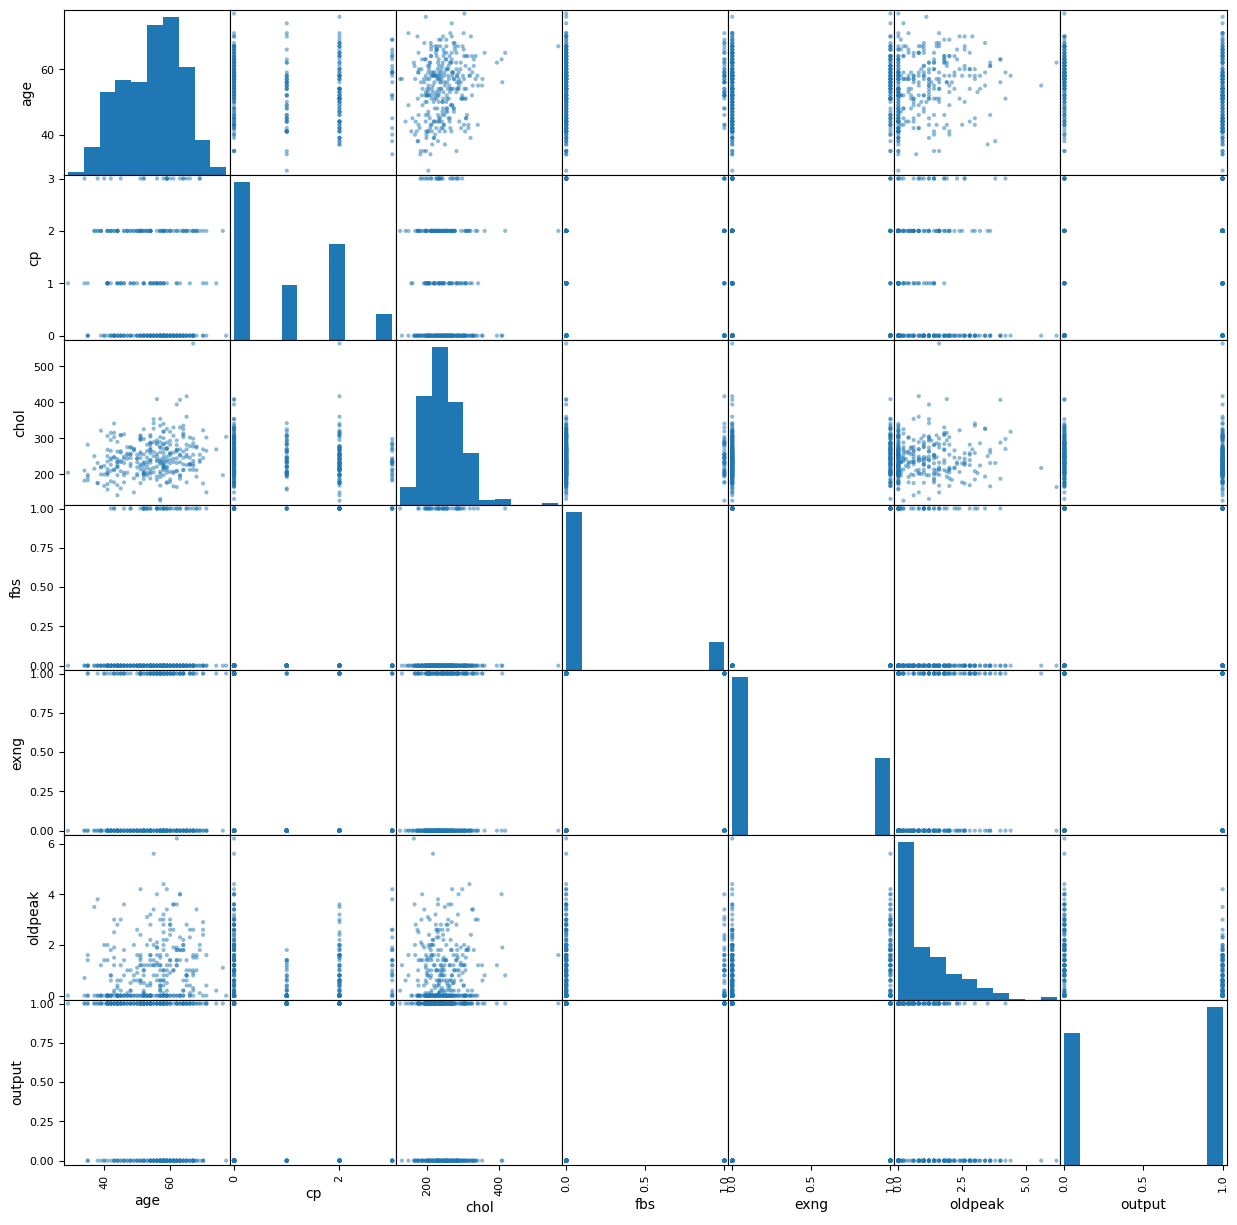

In [4]:
from pandas.plotting import scatter_matrix

scatter_plot = data[['age', 'cp', 'chol', 'fbs', 'exng', 'oldpeak', 'output']]
scatter_matrix(scatter_plot, figsize=(15,15));

## Splitting and Scaling the data

In [5]:
X = data.iloc[:, :-1]
y = data['output']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [7]:
N, D = X_train.shape

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the model

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
def schedule(epochs, lr):
  if epochs >= 50:
    return 0.001
  return 0.01

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [12]:
r = model.fit(X_train, y_train, validation_data=[X_test, y_test], epochs=100, callbacks=scheduler)

Epoch 1/100
8/8 [==============================] - 2s 93ms/step - loss: 0.6780 - accuracy: 0.6564 - val_loss: 0.7045 - val_accuracy: 0.6053 - lr: 0.0100
Epoch 2/100
8/8 [==============================] - 0s 16ms/step - loss: 0.5795 - accuracy: 0.7225 - val_loss: 0.6269 - val_accuracy: 0.6842 - lr: 0.0100
Epoch 3/100
8/8 [==============================] - 0s 16ms/step - loss: 0.5169 - accuracy: 0.7709 - val_loss: 0.5835 - val_accuracy: 0.7368 - lr: 0.0100
Epoch 4/100
8/8 [==============================] - 0s 24ms/step - loss: 0.4755 - accuracy: 0.8062 - val_loss: 0.5522 - val_accuracy: 0.7500 - lr: 0.0100
Epoch 5/100
8/8 [==============================] - 0s 16ms/step - loss: 0.4451 - accuracy: 0.8150 - val_loss: 0.5316 - val_accuracy: 0.7632 - lr: 0.0100
Epoch 6/100
8/8 [==============================] - 0s 31ms/step - loss: 0.4243 - accuracy: 0.8238 - val_loss: 0.5135 - val_accuracy: 0.8026 - lr: 0.0100
Epoch 7/100
8/8 [==============================] - 0s 22ms/step - loss: 0.4067 - a

## Evaluating and visualising the results

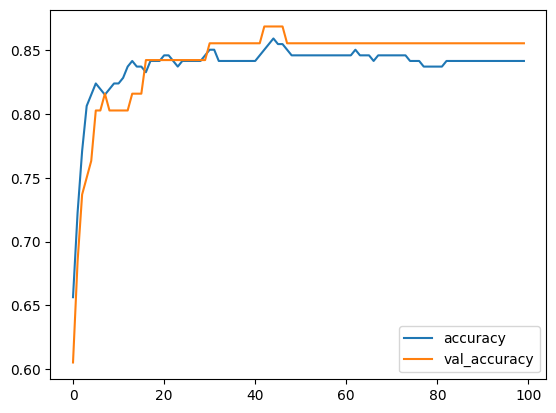

In [13]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend();

In [14]:
print(f"Train Score: {model.evaluate(X_train, y_train)}")

8/8 [==============================] - 0s 2ms/step - loss: 0.3321 - accuracy: 0.8414
Train Score: [0.33210062980651855, 0.8414096832275391]


In [15]:
print(f"Test Score: {model.evaluate(X_test, y_test)}")

3/3 [==============================] - 0s 4ms/step - loss: 0.4389 - accuracy: 0.8553
Test Score: [0.43889904022216797, 0.8552631735801697]
